![Top <](./images/watsonxdata.png "watsonxdata")

# Python Code example
This code will connect to watsonx.data and display some data from an existing table that was created in Presto. Note that the certificate is available in this Jupyter notebook environment in the /certs directory.

The next statement will execute a query and retrieve the entire result set.

In [13]:
import prestodb

conn1 = prestodb.dbapi.connect(
       host='watsonxdata',
       port=8443,
       user='ibmlhadmin',
       catalog='hive_data',
       schema='ontime',
       http_scheme='https',
       auth=prestodb.auth.BasicAuthentication("ibmlhadmin", "password")
)
conn1._http_session.verify = '/certs/lh-ssl-ts.crt'
cur1 = conn1.cursor()
conn2 = prestodb.dbapi.connect(
       host='watsonxdata',
       port=8443,
       user='ibmlhadmin',
       catalog='taxi',
       schema='',
       http_scheme='https',
       auth=prestodb.auth.BasicAuthentication("ibmlhadmin", "password")
)
conn2._http_session.verify = '/certs/lh-ssl-ts.crt'
cur2 = conn2.cursor()

In [14]:
import pandas as pd

In [106]:
cur1.execute("SELECT dayofmonth, dayofweek, flightdate, reporting_airline, originairportid," +
             "destairportid, dest, deptime, depdelay, depdelayminutes, crsarrtime, arrtime, arrdelay, arrdelayminutes FROM hive_data.ontime.ontime")
on_time_data = cur1.fetchall()
columns = ['DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 
           'OriginAirportID', 'DestAirportID', 'Dest', 'DepTime', 'DepDelay', 'DepDelayMinutes', 
           'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes']
on_time_data_frame = pd.DataFrame(on_time_data, columns=columns)
df_shuffled = on_time_data_frame.sample(frac=1, random_state=42)
on_time_subset = df_shuffled.head(42326)
print(on_time_subset)

        DayofMonth  DayOfWeek  FlightDate Reporting_Airline  OriginAirportID  \
121520          10          4  2013-01-10                DL            11292   
224565          18          5  2013-01-18                YV            13198   
311676          25          5  2013-01-25                US            11057   
131331          26          6  2013-01-26                OO            12892   
352802          11          5  2013-01-11                WN            10792   
...            ...        ...         ...               ...              ...   
188172          16          3  2013-01-16                MQ            13303   
214668          12          6  2013-01-12                AS            10299   
463446           6          7  2013-01-06                OO            14869   
331941           5          6  2013-01-05                F9            10643   
101940           2          3  2013-01-02                DL            13487   

        DestAirportID Dest  DepTime  De

In [178]:
cur1.execute("SELECT dayofmonth, dayofweek, flightdate, reporting_airline, originairportid," +
             "destairportid, dest, deptime, depdelay, depdelayminutes, crsarrtime, arrtime, arrdelay, arrdelayminutes FROM hive_data.ontime.ontime WHERE flightdate = '2013-01-01'")
check_data = cur1.fetchall()
columns  = ['DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 
           'OriginAirportID', 'DestAirportID', 'Dest', 'DepTime', 'DepDelay', 'DepDelayMinutes', 
           'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes']
check_df = pd.DataFrame(check_data, columns= columns)

       DayofMonth  DayOfWeek  FlightDate Reporting_Airline  OriginAirportID  \
0               1          2  2013-01-01                9E            11193   
1               1          2  2013-01-01                9E            11278   
2               1          2  2013-01-01                9E            13930   
3               1          2  2013-01-01                9E            12478   
4               1          2  2013-01-01                9E            13487   
...           ...        ...         ...               ...              ...   
14860           1          2  2013-01-01                UA            11618   
14861           1          2  2013-01-01                UA            12892   
14862           1          2  2013-01-01                UA            14635   
14863           1          2  2013-01-01                UA            11618   
14864           1          2  2013-01-01                UA            13204   

       DestAirportID Dest  DepTime  DepDelay  DepDe

In [108]:
cur2.execute("SELECT trip_id, company, trip_start_timestamp," +
             "trip_miles, trip_seconds FROM hive_data.taxi.taxirides")
taxi_rides_data = cur2.fetchall()
columns = ['trip_id', 'company', 'trip_start_timestamp', 'trip_miles', 'trip_seconds']
taxi_rides_data_frame = pd.DataFrame(taxi_rides_data, columns= columns)
taxi_rides_data_frame['trip_start_timestamp'] = pd.to_datetime(taxi_rides_data_frame['trip_start_timestamp'])
taxi_rides_data_frame['start_date'] = taxi_rides_data_frame['trip_start_timestamp'].dt.date
taxi_rides_data_frame['start_time'] = taxi_rides_data_frame['trip_start_timestamp'].dt.time
taxi_rides_data_frame['formatted_start_time'] = taxi_rides_data_frame['start_time'].apply(lambda timestamp: ''.join(str(timestamp).split(':')[:2]))
taxi_rides_data_frame['formatted_start_time'] = taxi_rides_data_frame['formatted_start_time'].astype(int)

       trip_id                            company trip_start_timestamp  \
0            1                       Taxi No Name  2013-01-01 00:00:00   
1            4          Dispatch Taxi Affiliation  2013-01-01 00:00:00   
2            5                       Taxi No Name  2013-01-01 00:00:00   
3            6                       Taxi No Name  2013-01-01 00:00:00   
4            7  Blue Ribbon Taxi Association Inc.  2013-01-01 00:00:00   
...        ...                                ...                  ...   
42321    42324          Taxi Affiliation Services  2013-01-01 19:15:00   
42322    42325  Blue Ribbon Taxi Association Inc.  2013-01-01 19:15:00   
42323    42326          Taxi Affiliation Services  2013-01-01 19:15:00   
42324    42327          Taxi Affiliation Services  2013-01-01 19:15:00   
42325    42328                       Taxi No Name  2013-01-01 19:15:00   

       trip_miles  trip_seconds  start_date start_time  formatted_start_time  
0             0.4           240 

In [222]:
df_random = check_df.sample(frac=1, random_state=42)
check_subset_ordered = df_random.sort_values(by='ArrTime')
check_subset = df_random.head(14865)

       DayofMonth  DayOfWeek  FlightDate Reporting_Airline  OriginAirportID  \
12849           1          2  2013-01-01                OO            11109   
10562           1          2  2013-01-01                WN            12892   
13524           1          2  2013-01-01                US            11057   
10684           1          2  2013-01-01                EV            13930   
542             1          2  2013-01-01                9E            11433   
...           ...        ...         ...               ...              ...   
5191            1          2  2013-01-01                WN            11259   
13418           1          2  2013-01-01                UA            12266   
5390            1          2  2013-01-01                OO            10561   
860             1          2  2013-01-01                B6            12478   
7270            1          2  2013-01-01                OO            14771   

       DestAirportID Dest  DepTime  DepDelay  DepDe

In [202]:
taxi_rides_ordered_df = taxi_rides_data_frame.sort_values(by='formatted_start_time')
taxi_rides_random = taxi_rides_ordered_df.sample(frac=1, random_state=42)
taxi_rides_subset = taxi_rides_random.head(14865)
taxi_rides_subset_ordered = taxi_rides_subset.sort_values(by='formatted_start_time')

In [87]:
from matplotlib import pyplot as plt

In [228]:
check_taxi_rides_merged_df = pd.merge(check_subset[['ArrDelay', 'ArrTime']], 
                                      taxi_rides_data_frame[['formatted_start_time']], 
                                      left_index=True, 
                                      right_index=True, 
                                      how='right')
print(check_taxi_rides_merged_df)
print(len(check_subset['ArrDelay']))

       ArrDelay  ArrTime  formatted_start_time
0          64.0   1604.0                     0
1         -26.0   1333.0                     0
2         -29.0   1446.0                     0
3         -29.0   2144.0                     0
4          85.0   1345.0                     0
...         ...      ...                   ...
42321       NaN      NaN                  1915
42322       NaN      NaN                  1915
42323       NaN      NaN                  1915
42324       NaN      NaN                  1915
42325       NaN      NaN                  1915

[42326 rows x 3 columns]
14865


       ArrDelay  formatted_start_time
0           NaN                     0
1           NaN                     0
2           NaN                     0
3           NaN                     0
4           NaN                     0
...         ...                   ...
42321       NaN                  1915
42322       NaN                  1915
42323       NaN                  1915
42324       NaN                  1915
42325       NaN                  1915

[42326 rows x 2 columns]


Text(0.5, 0, 'Pickup Time')

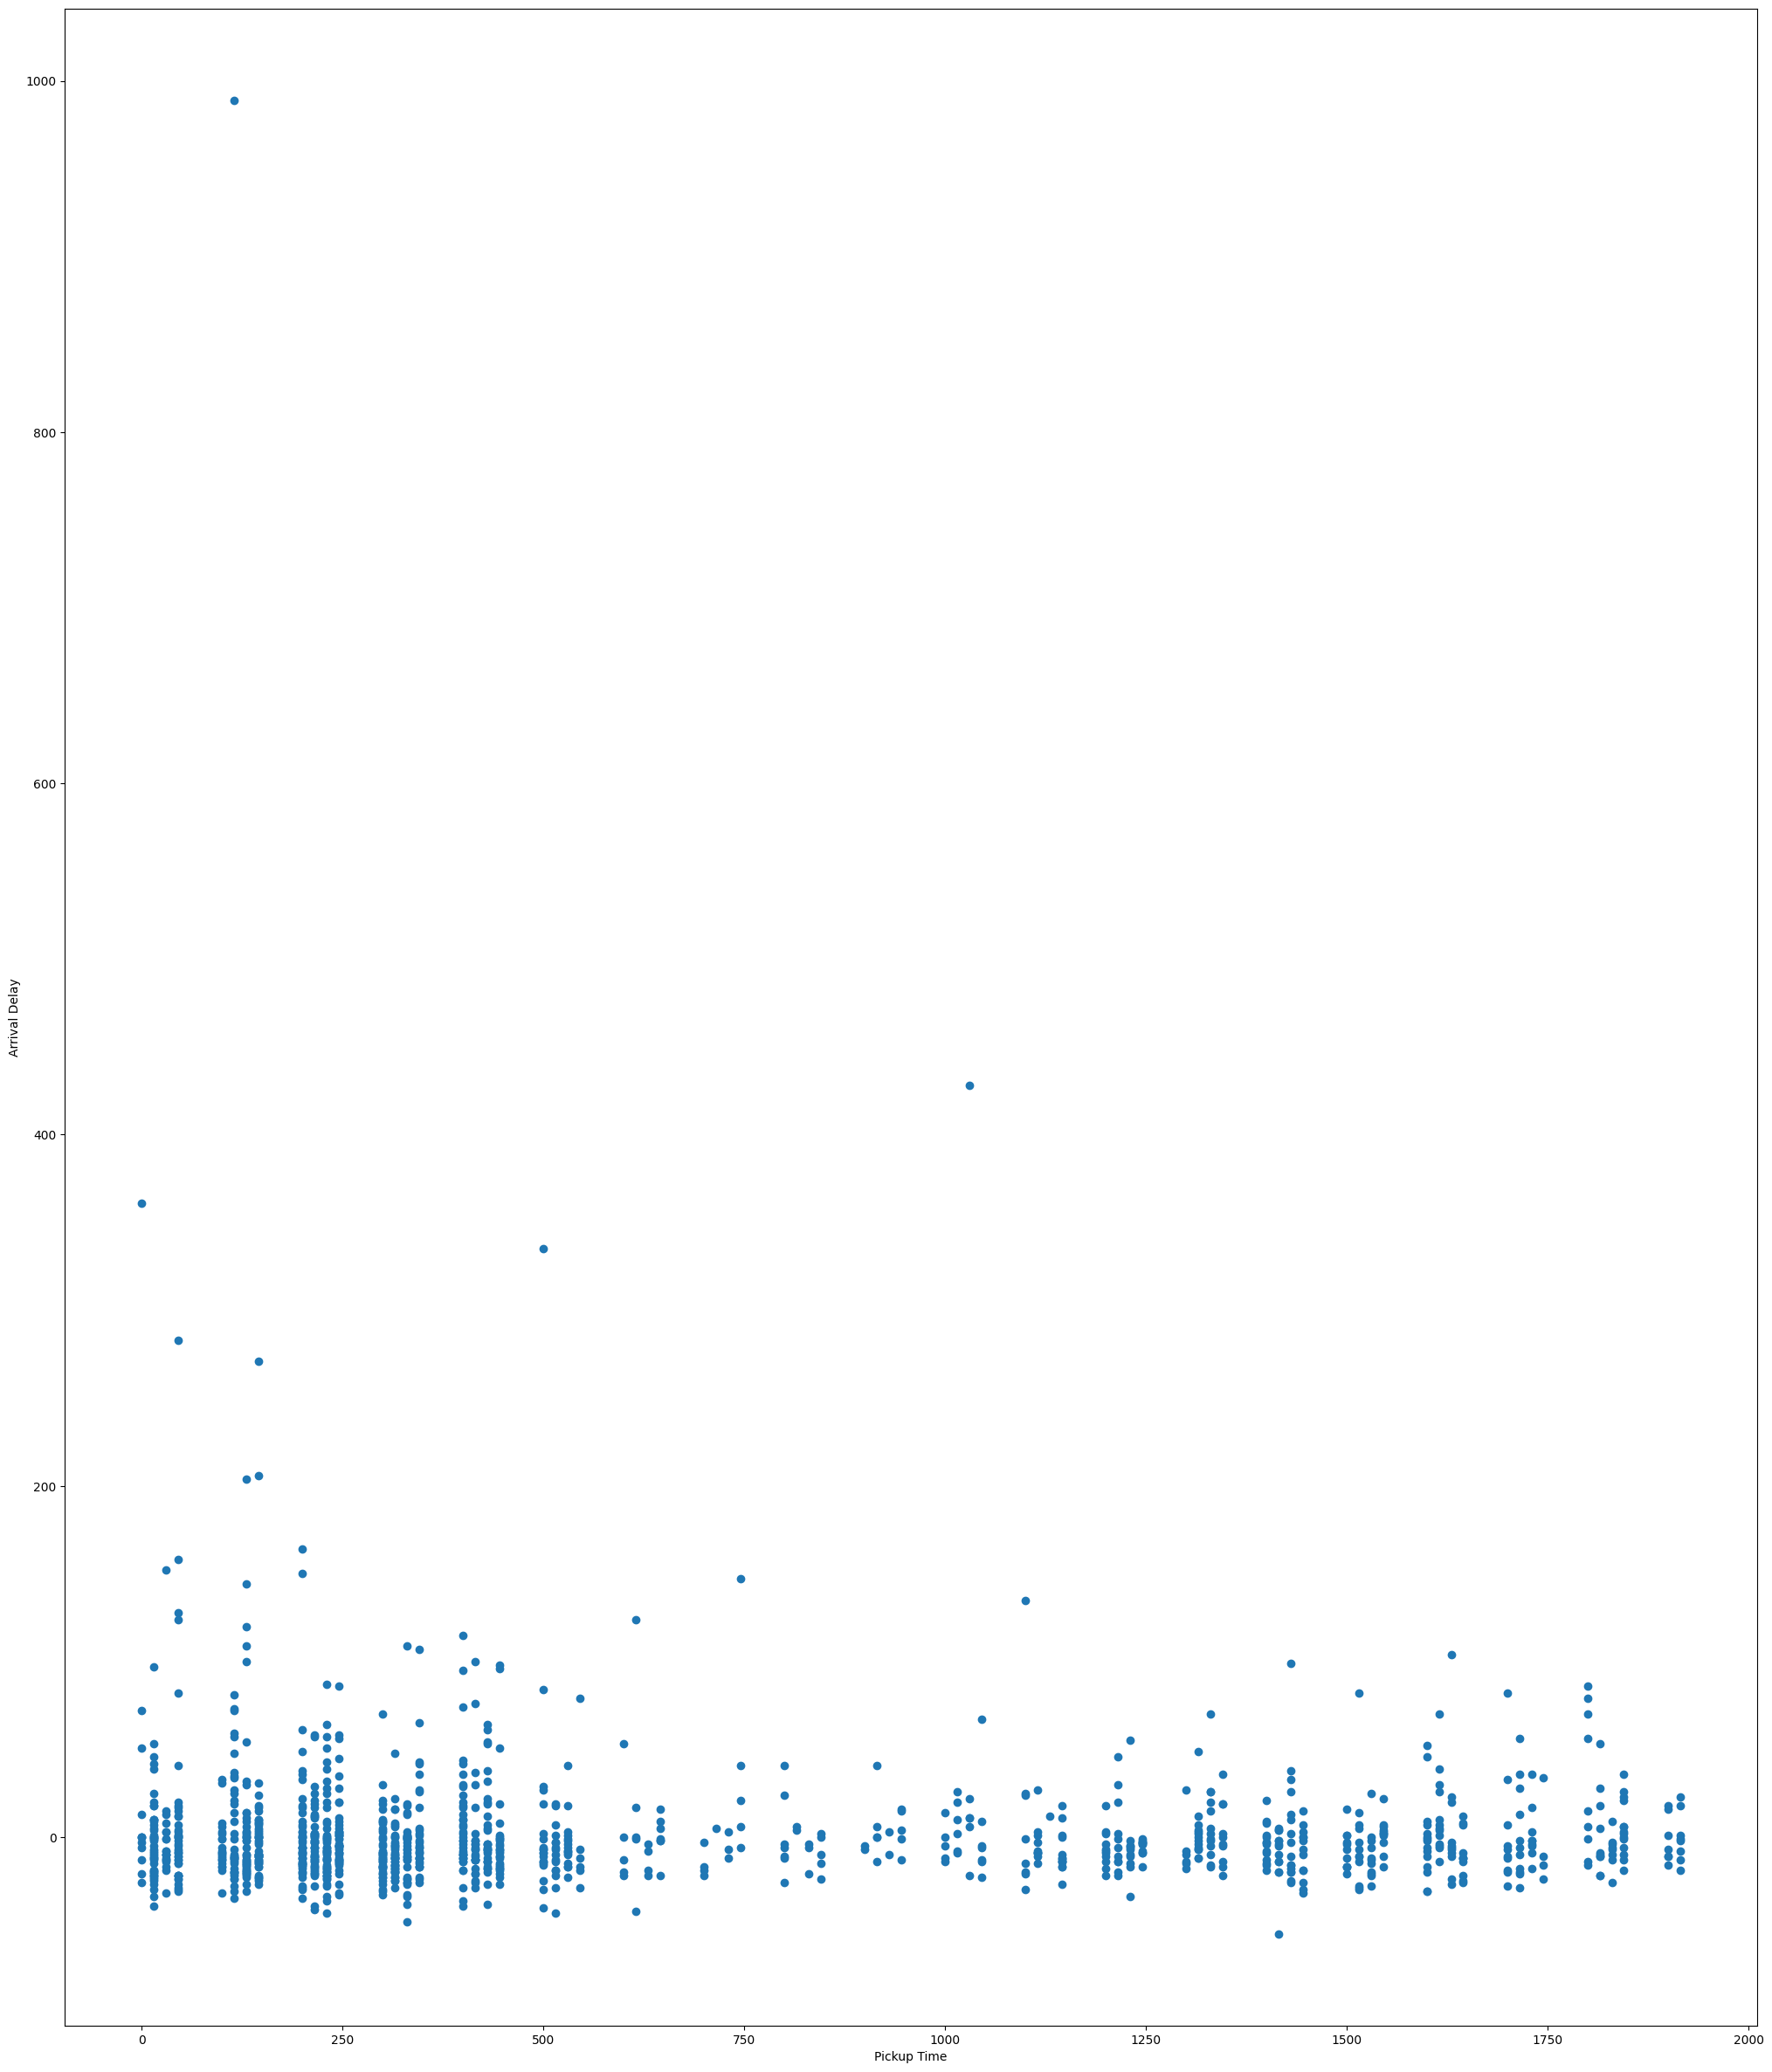

In [235]:
sampled_df = valid_rows_df.sample(n=14865, random_state=42)
merged_df = pd.merge(sorted_on_time_df['ArrDelay'], taxi_rides_data_frame['formatted_start_time'], left_index=True, right_index=True, how='right')
print(merged_df)
plt.figure(figsize=(25, 30))
plt.scatter('formatted_start_time', 'ArrDelay', data=merged_df)
plt.ylabel('Arrival Delay')
plt.xlabel('Pickup Time')

In [145]:
cur1.execute("SELECT arrdelay, arrdelayminutes, carrierdelay, weatherdelay, nasdelay, securitydelay, lateaircraftdelay FROM hive_data.ontime.ontime")
delay_data = cur1.fetchall()
columns = ['ArrDelay', 'ArrDelayMinutes', 'CarrierDelay', 'WeatherDelay', 'NasDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_data_frame = pd.DataFrame(delay_data, columns=columns)
print(delay_data_frame)

        ArrDelay  ArrDelayMinutes  CarrierDelay  WeatherDelay  NasDelay  \
0              8                8             0             0         0   
1             21               21             0             0         0   
2             52               52             0             0         0   
3             25               25             0             0         0   
4             34               34             4             0         0   
...          ...              ...           ...           ...       ...   
498082        25               25            21             0         0   
498083         9                9             0             0         0   
498084         9                9             0             0         0   
498085        22               22             3             0         5   
498086        24               24             0             0         6   

        SecurityDelay  LateAircraftDelay  
0                   0                  0  
1            

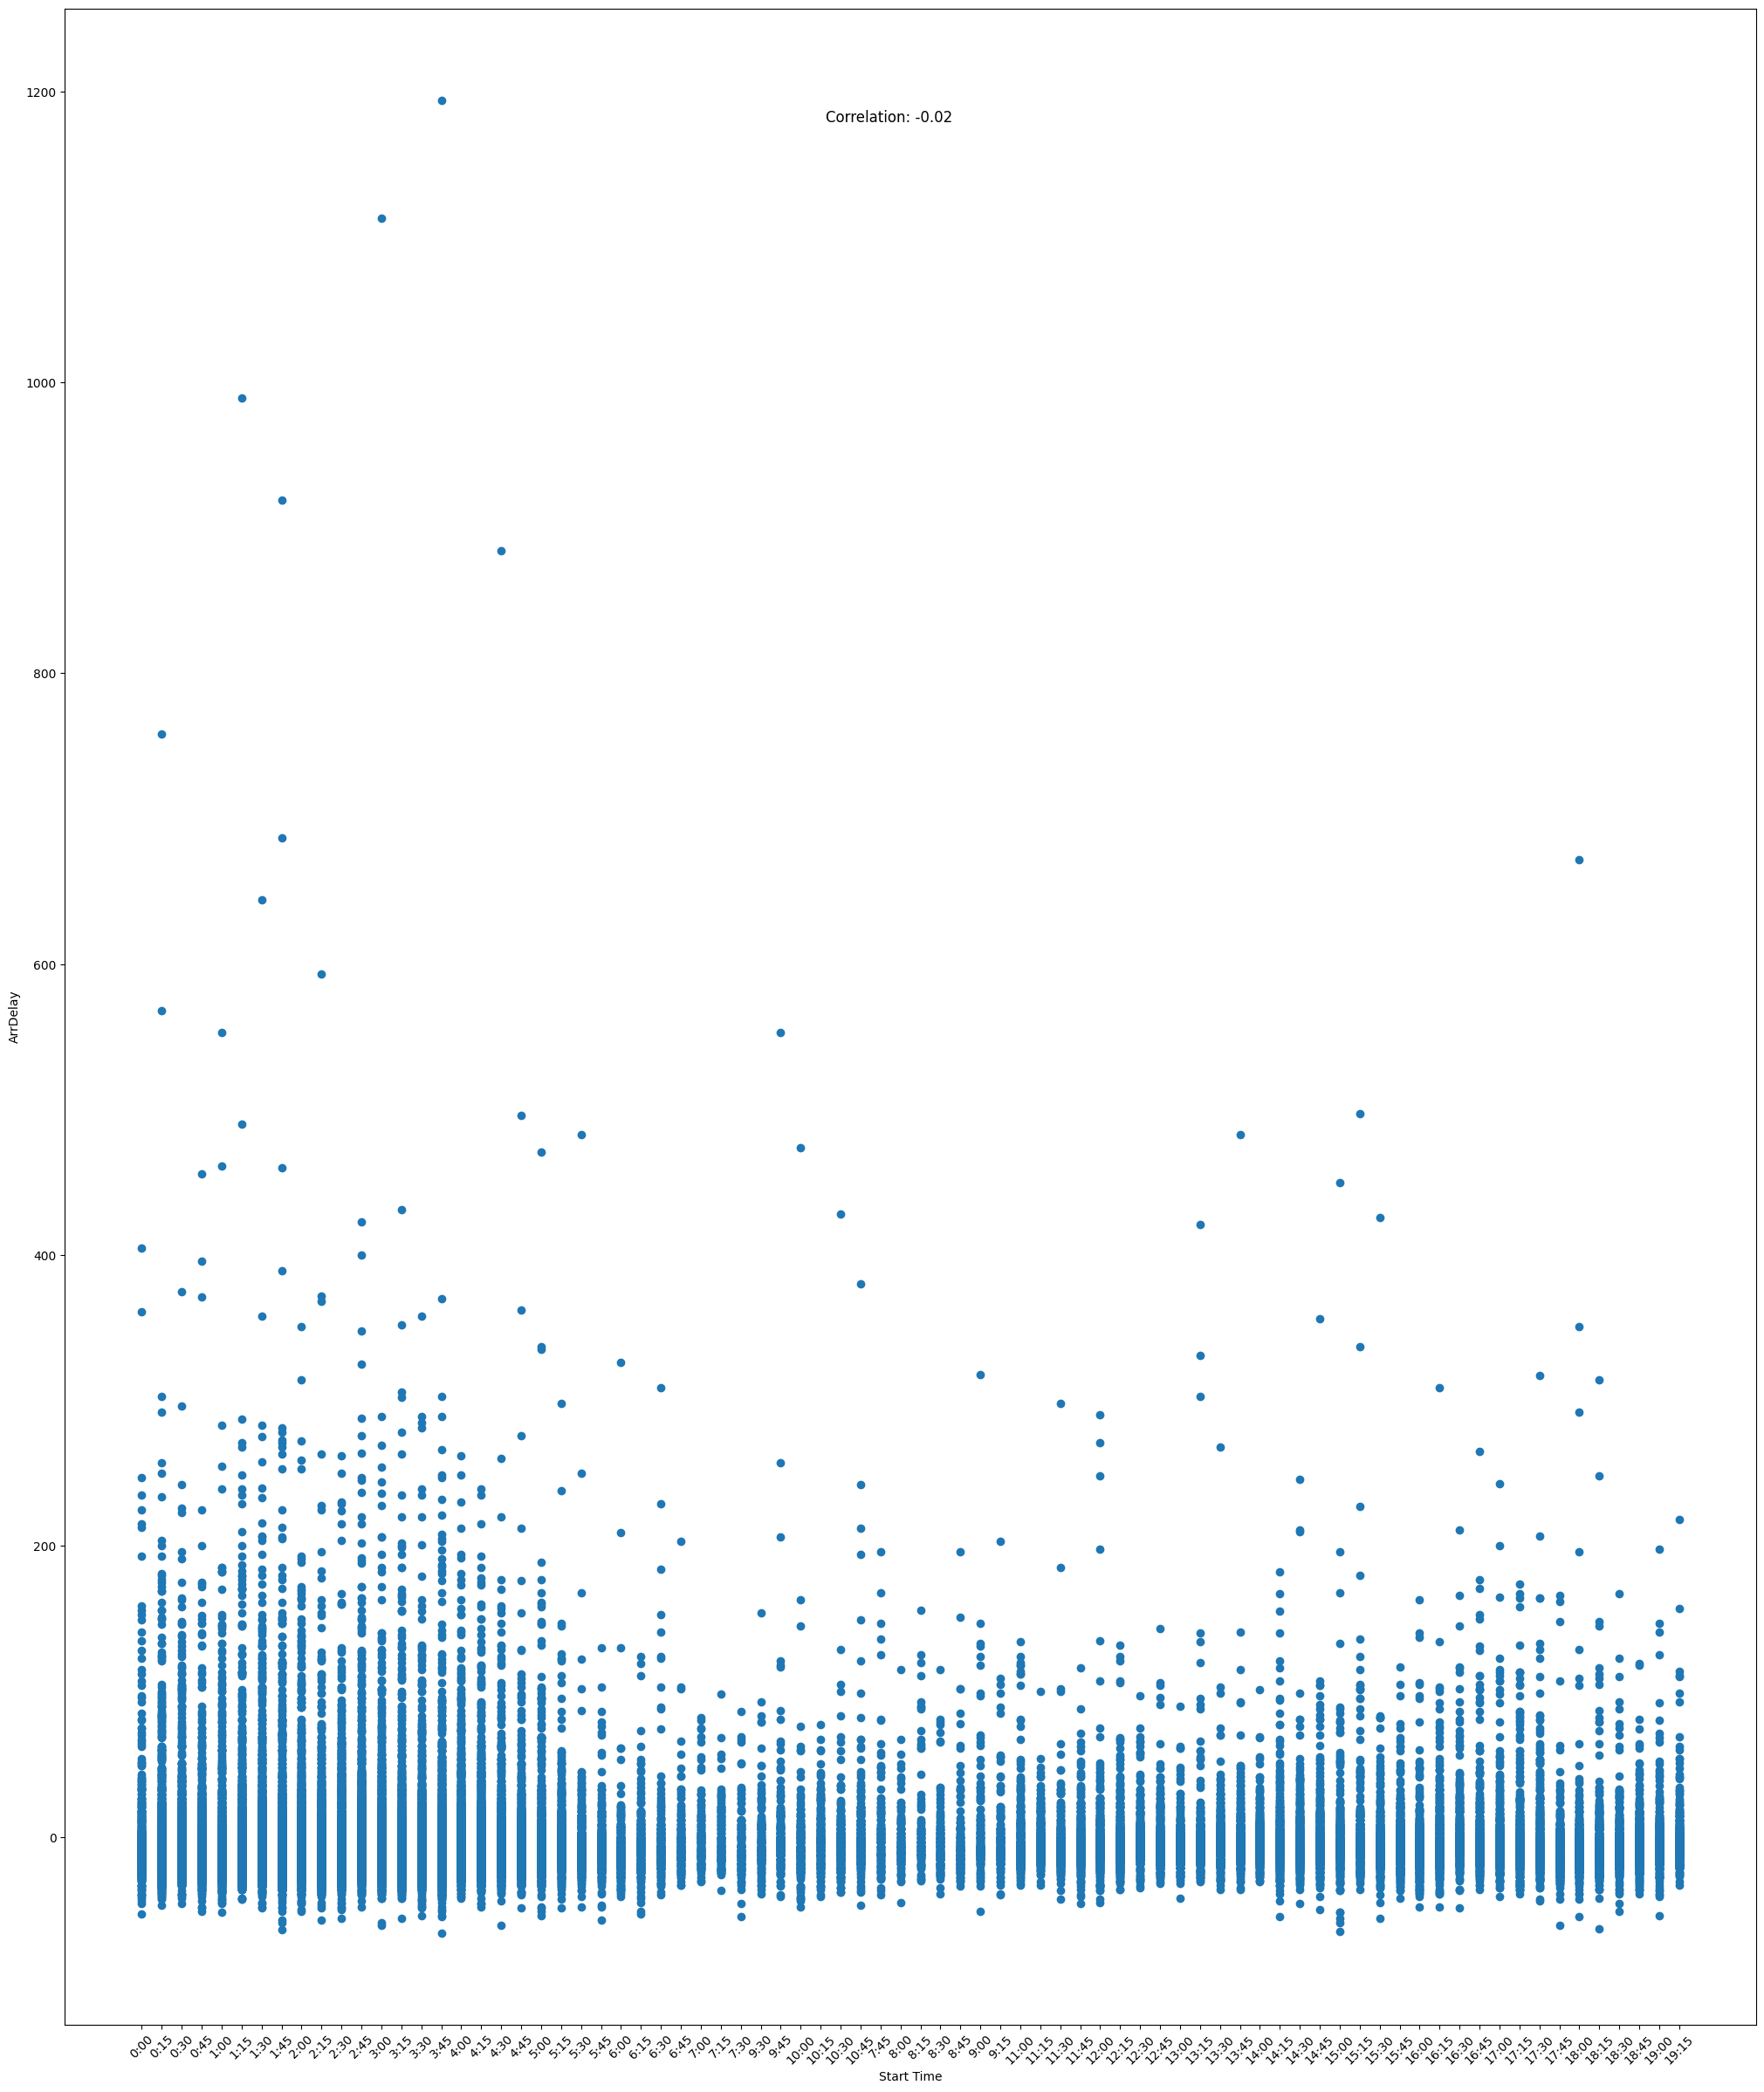

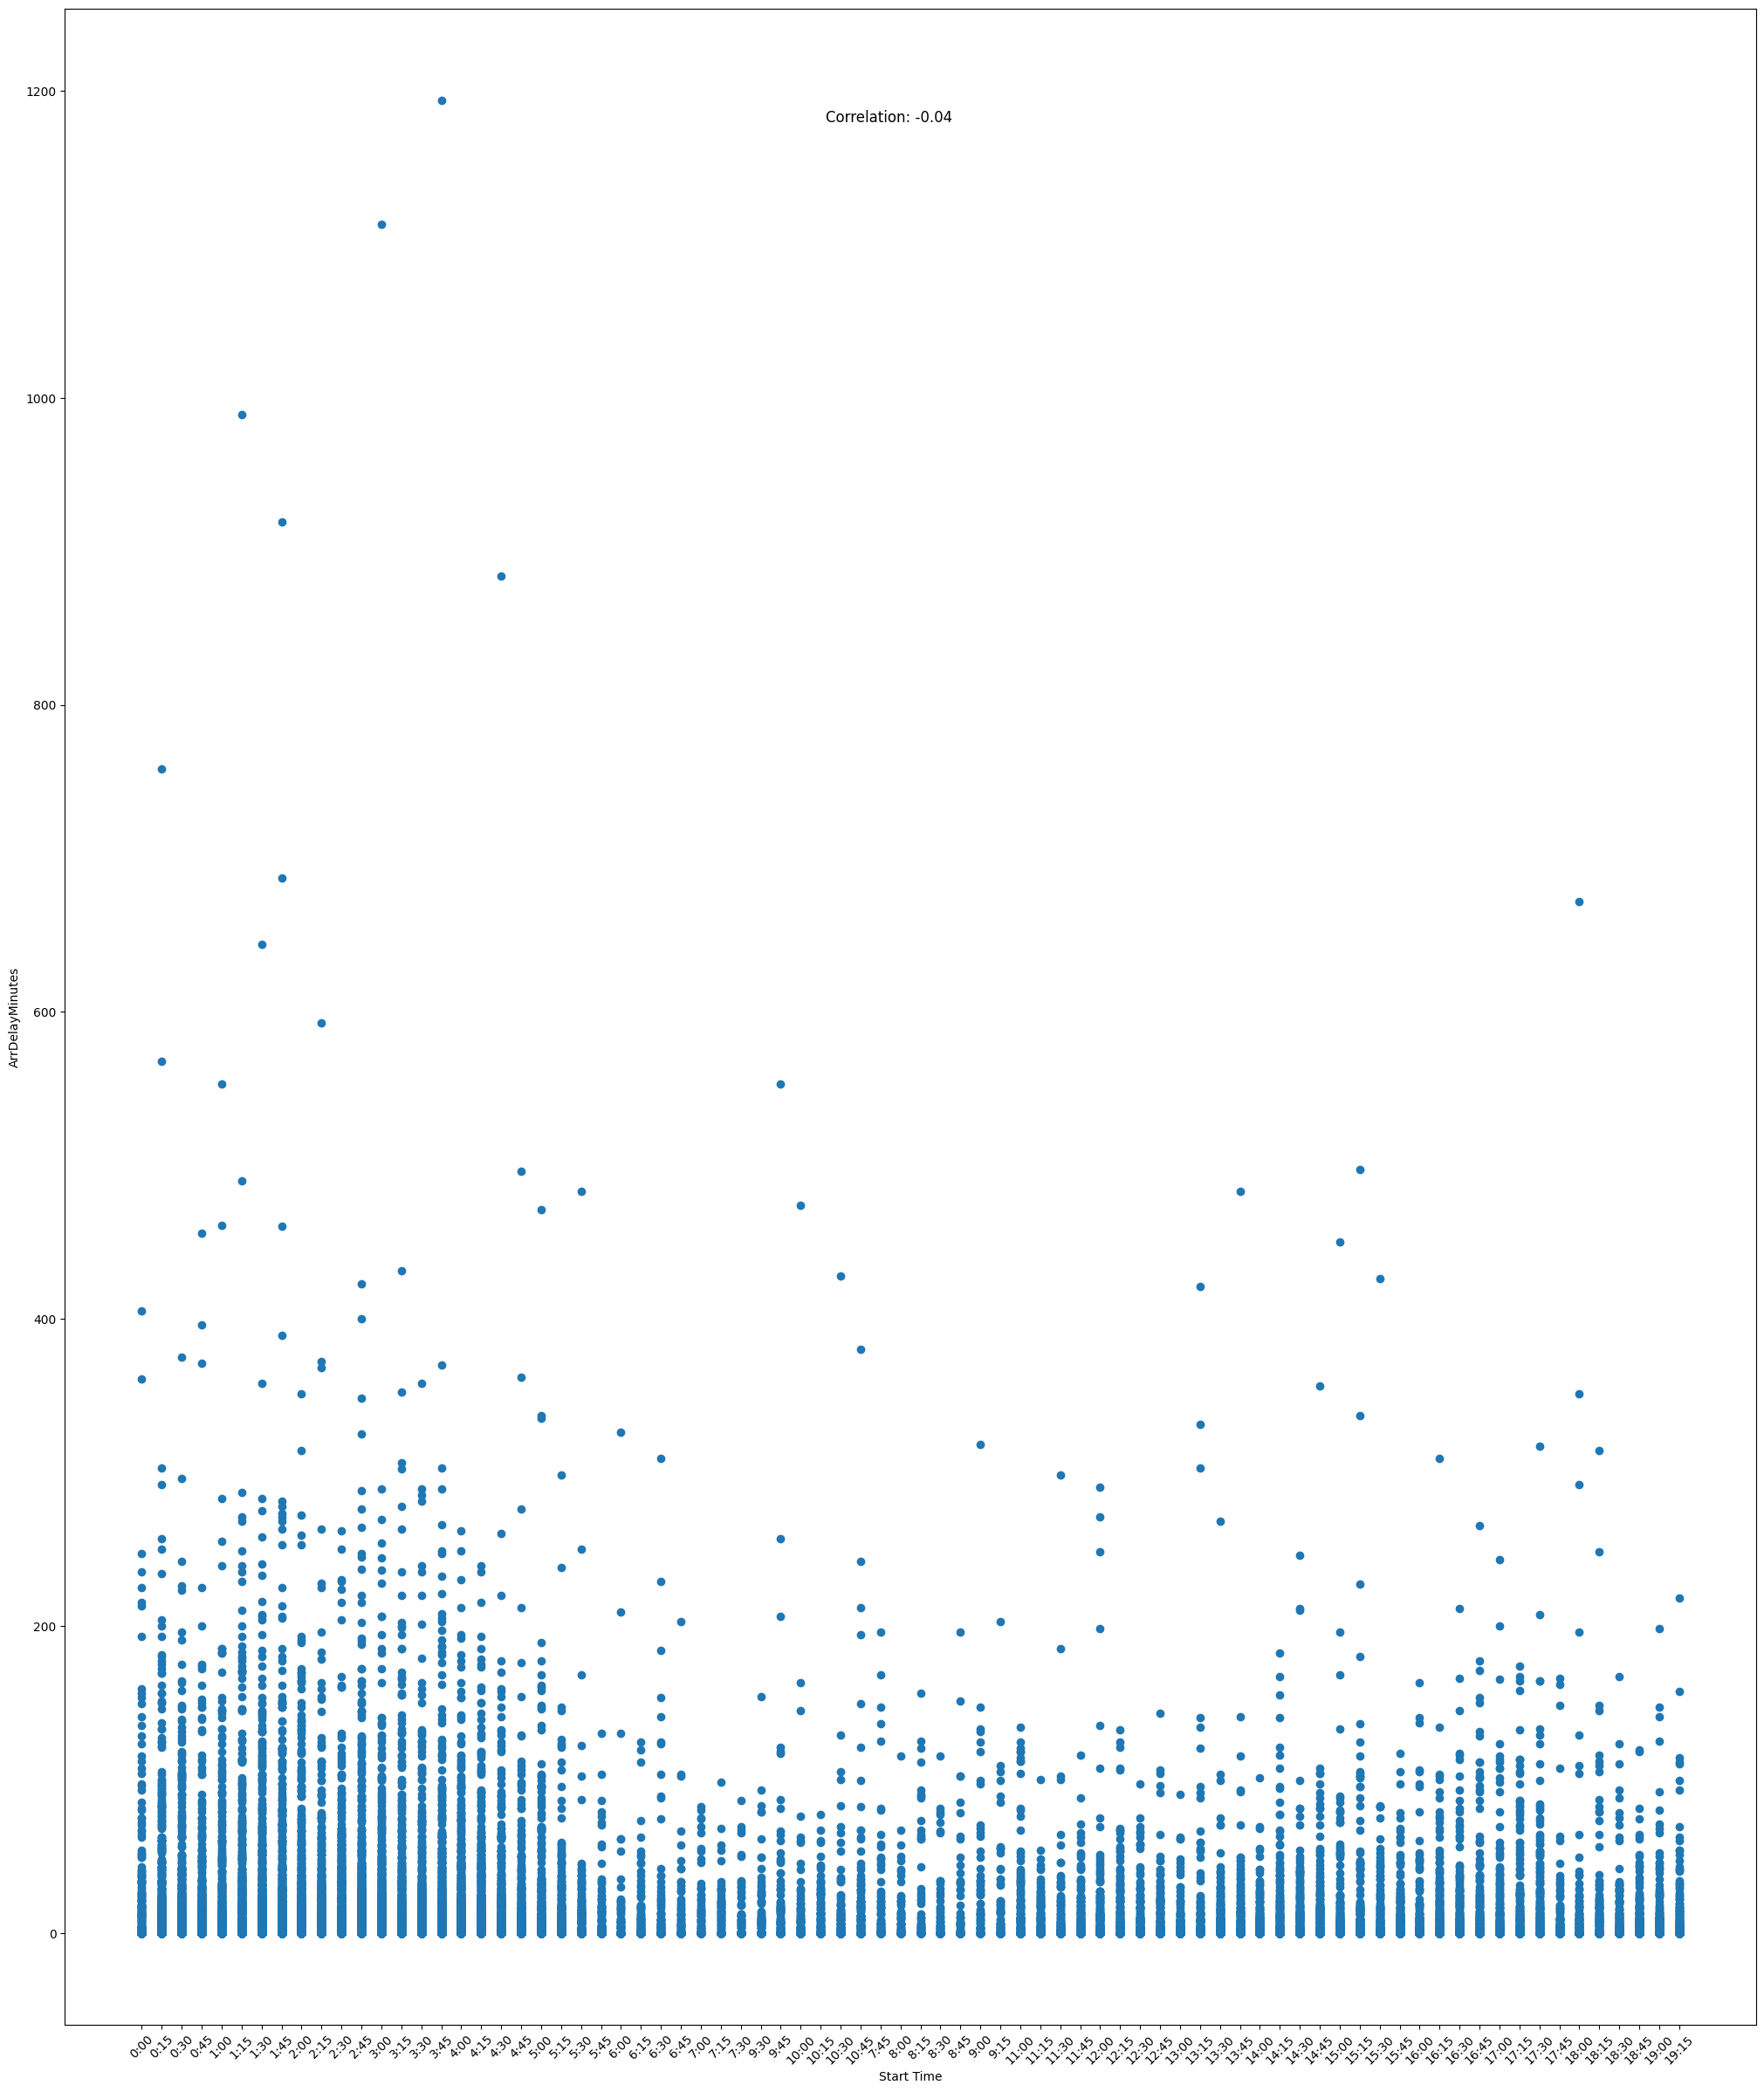

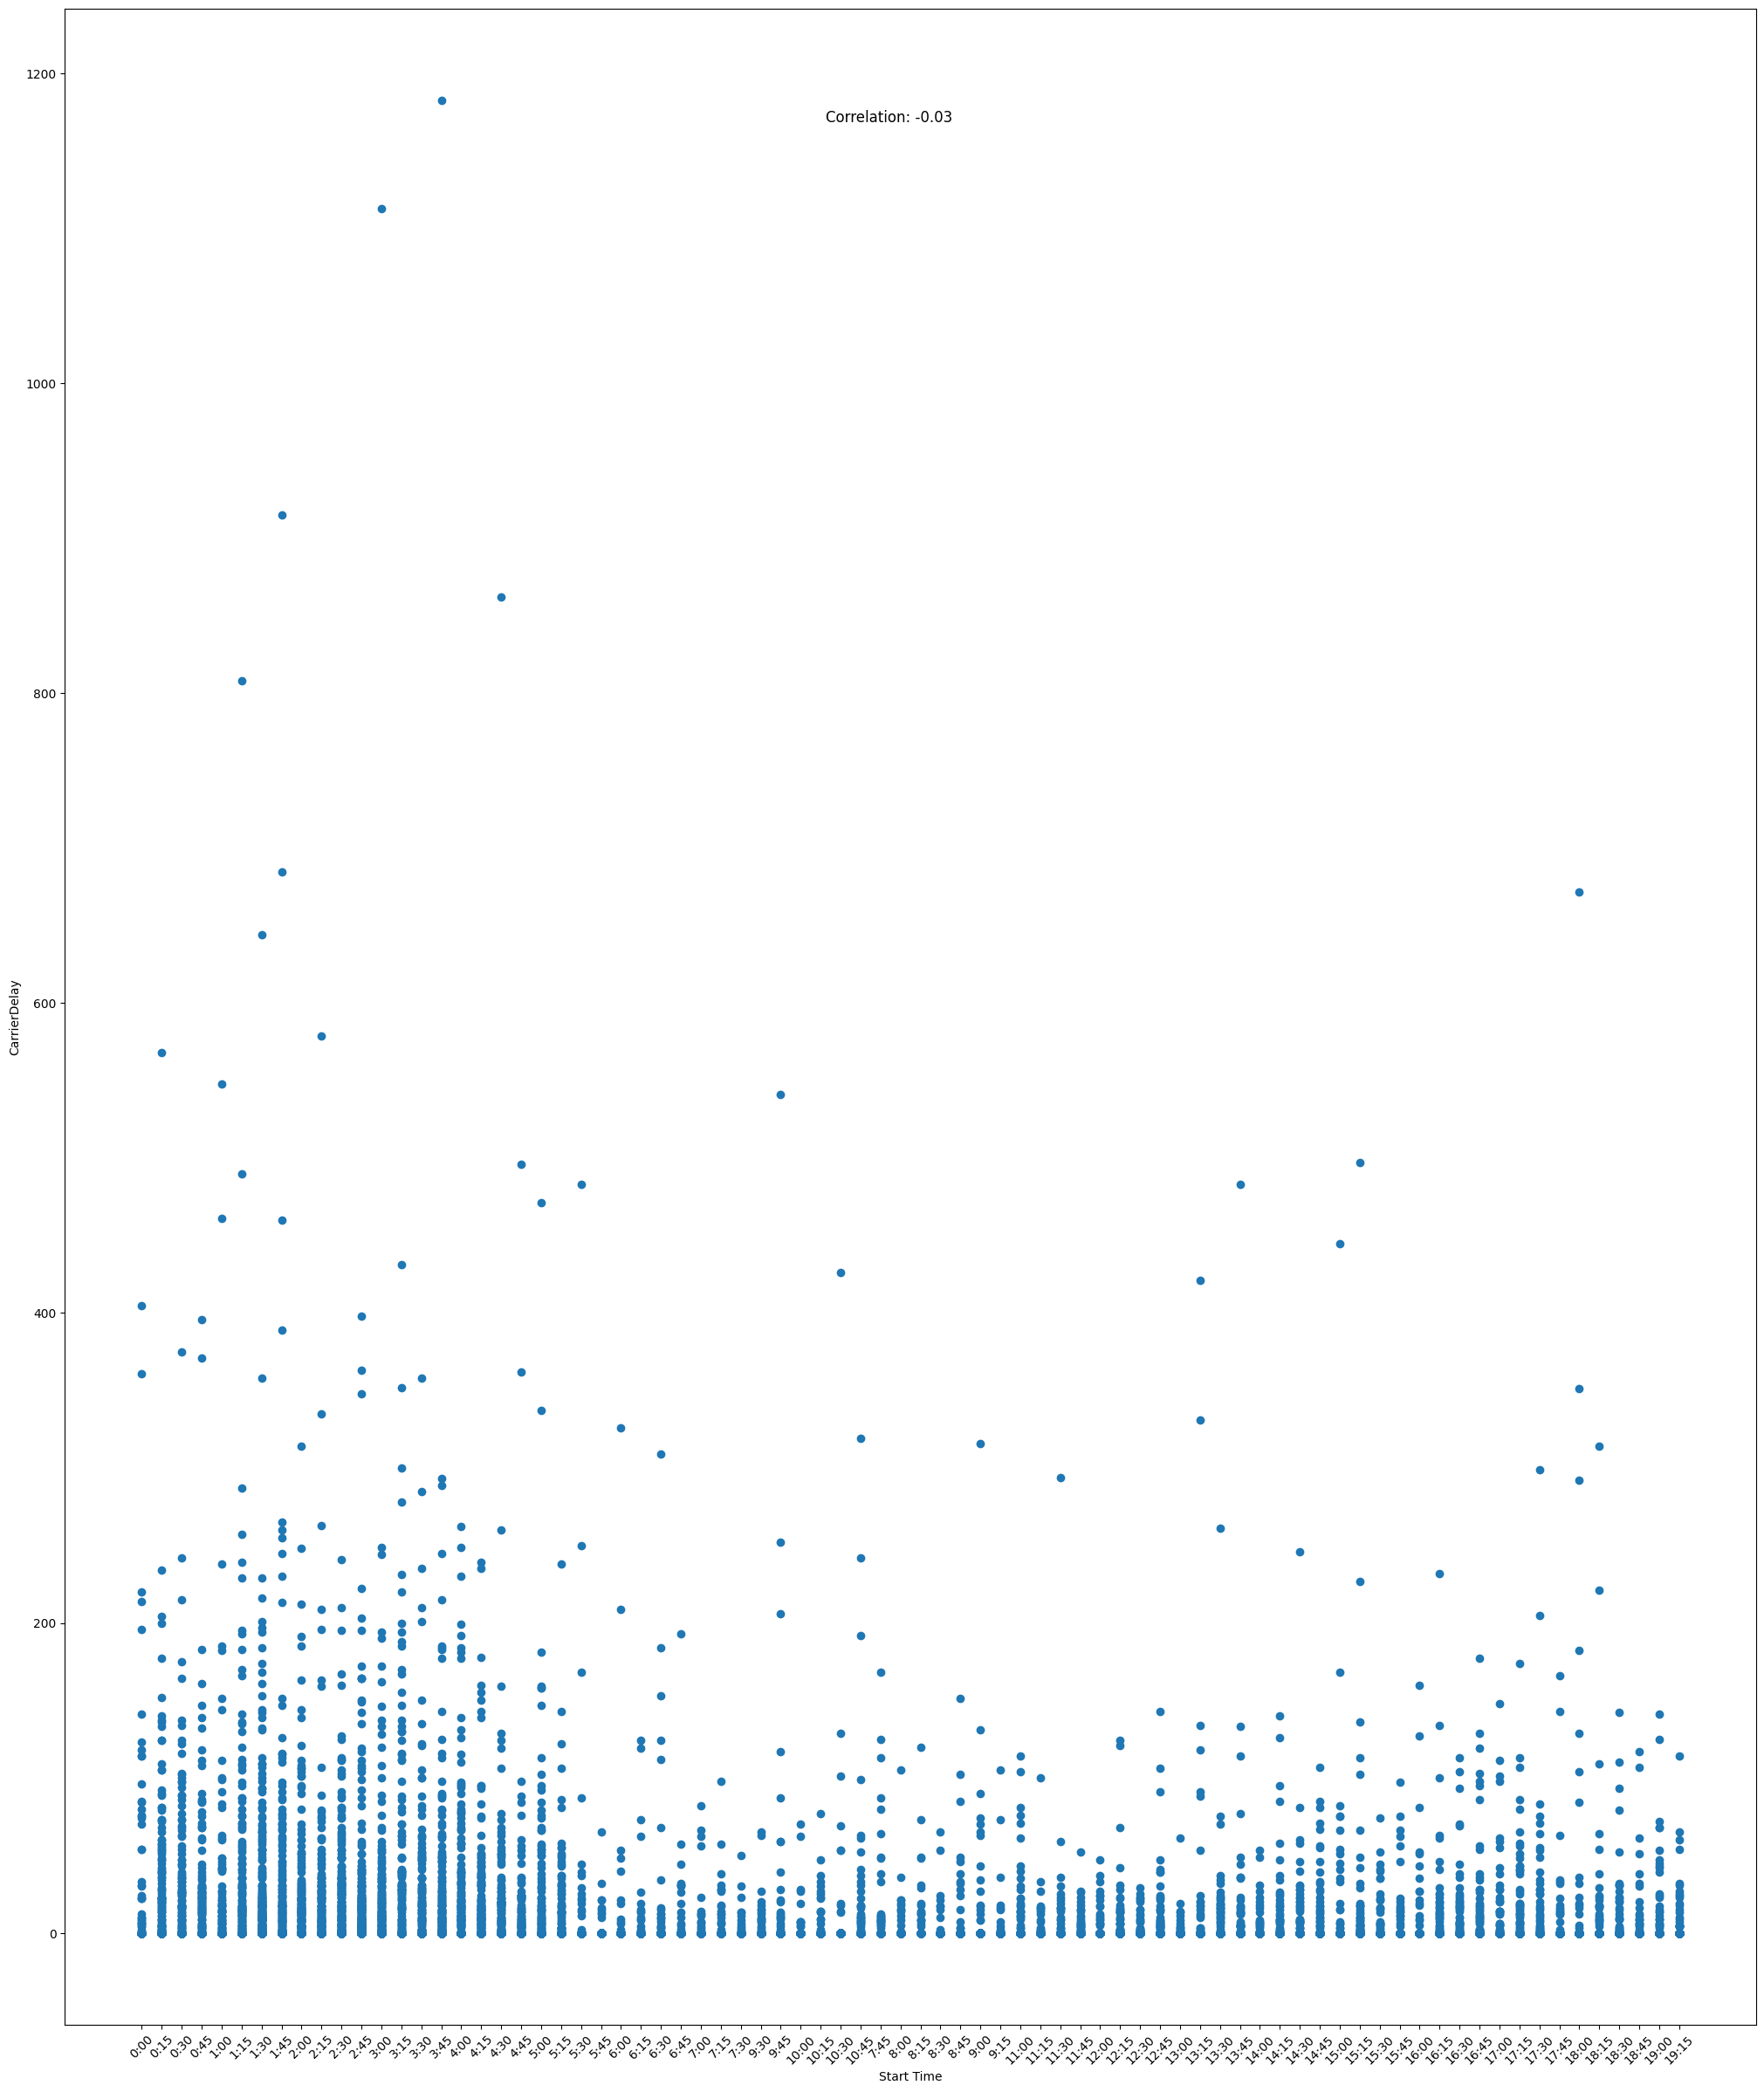

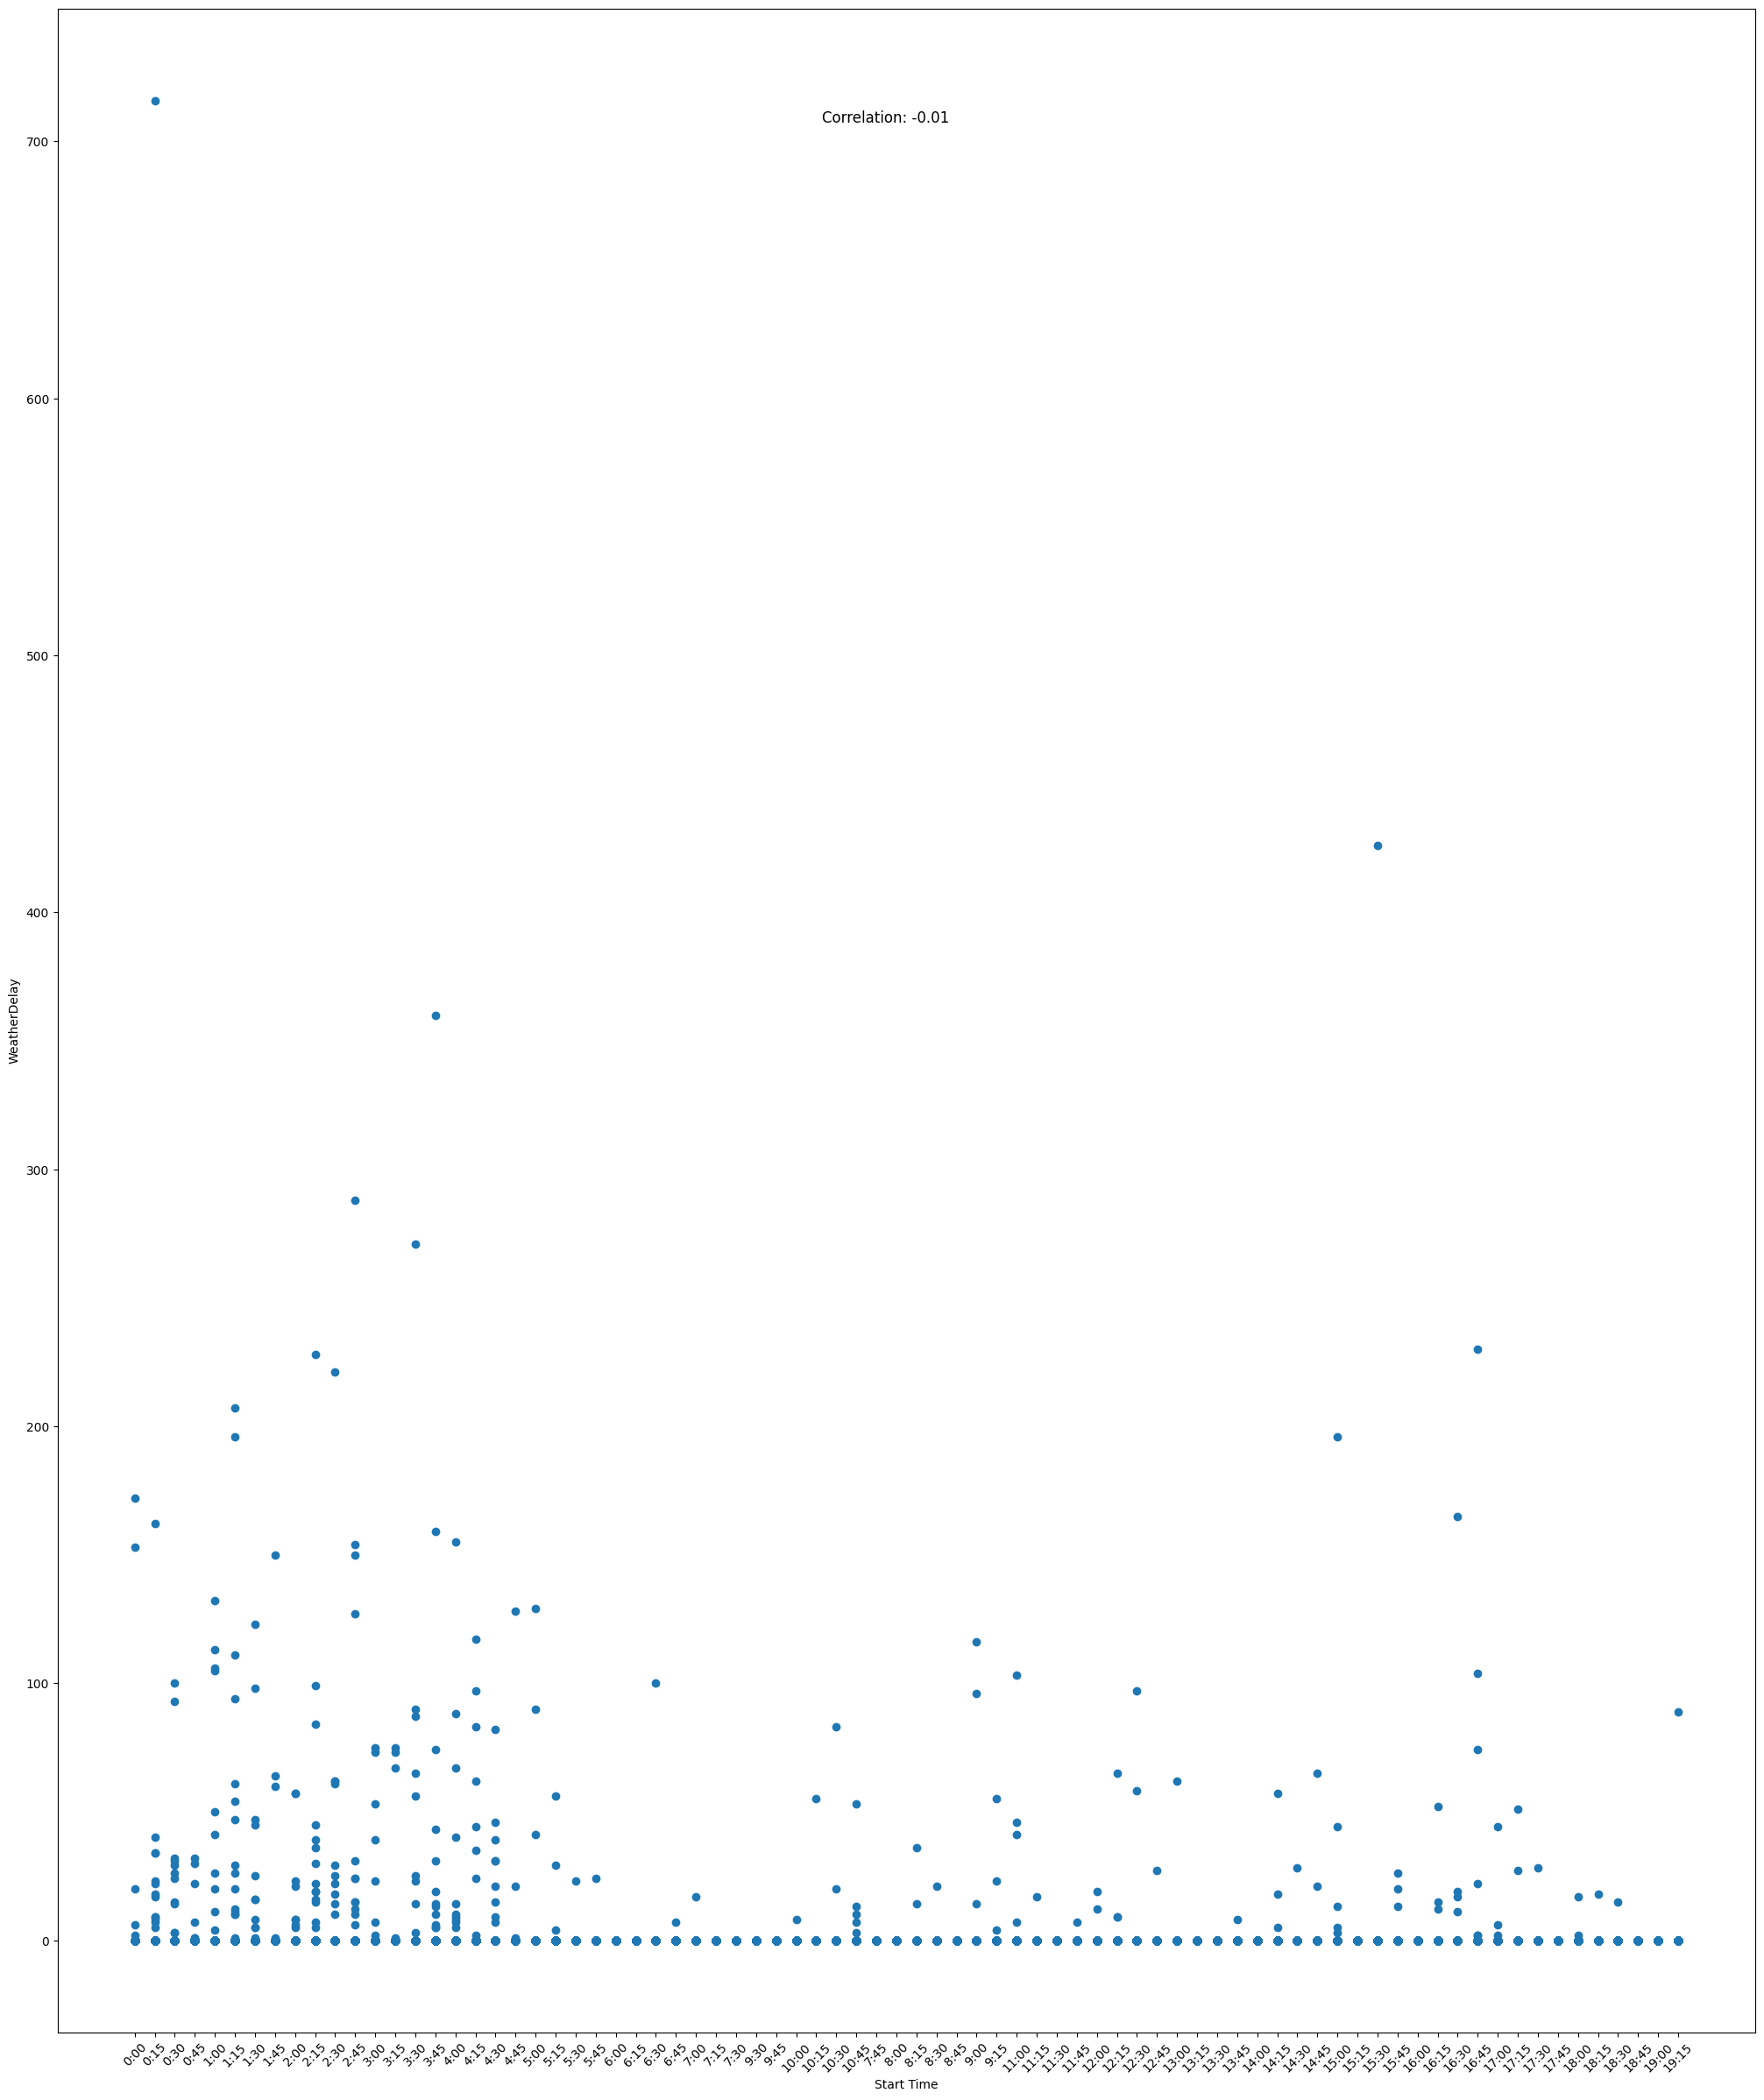

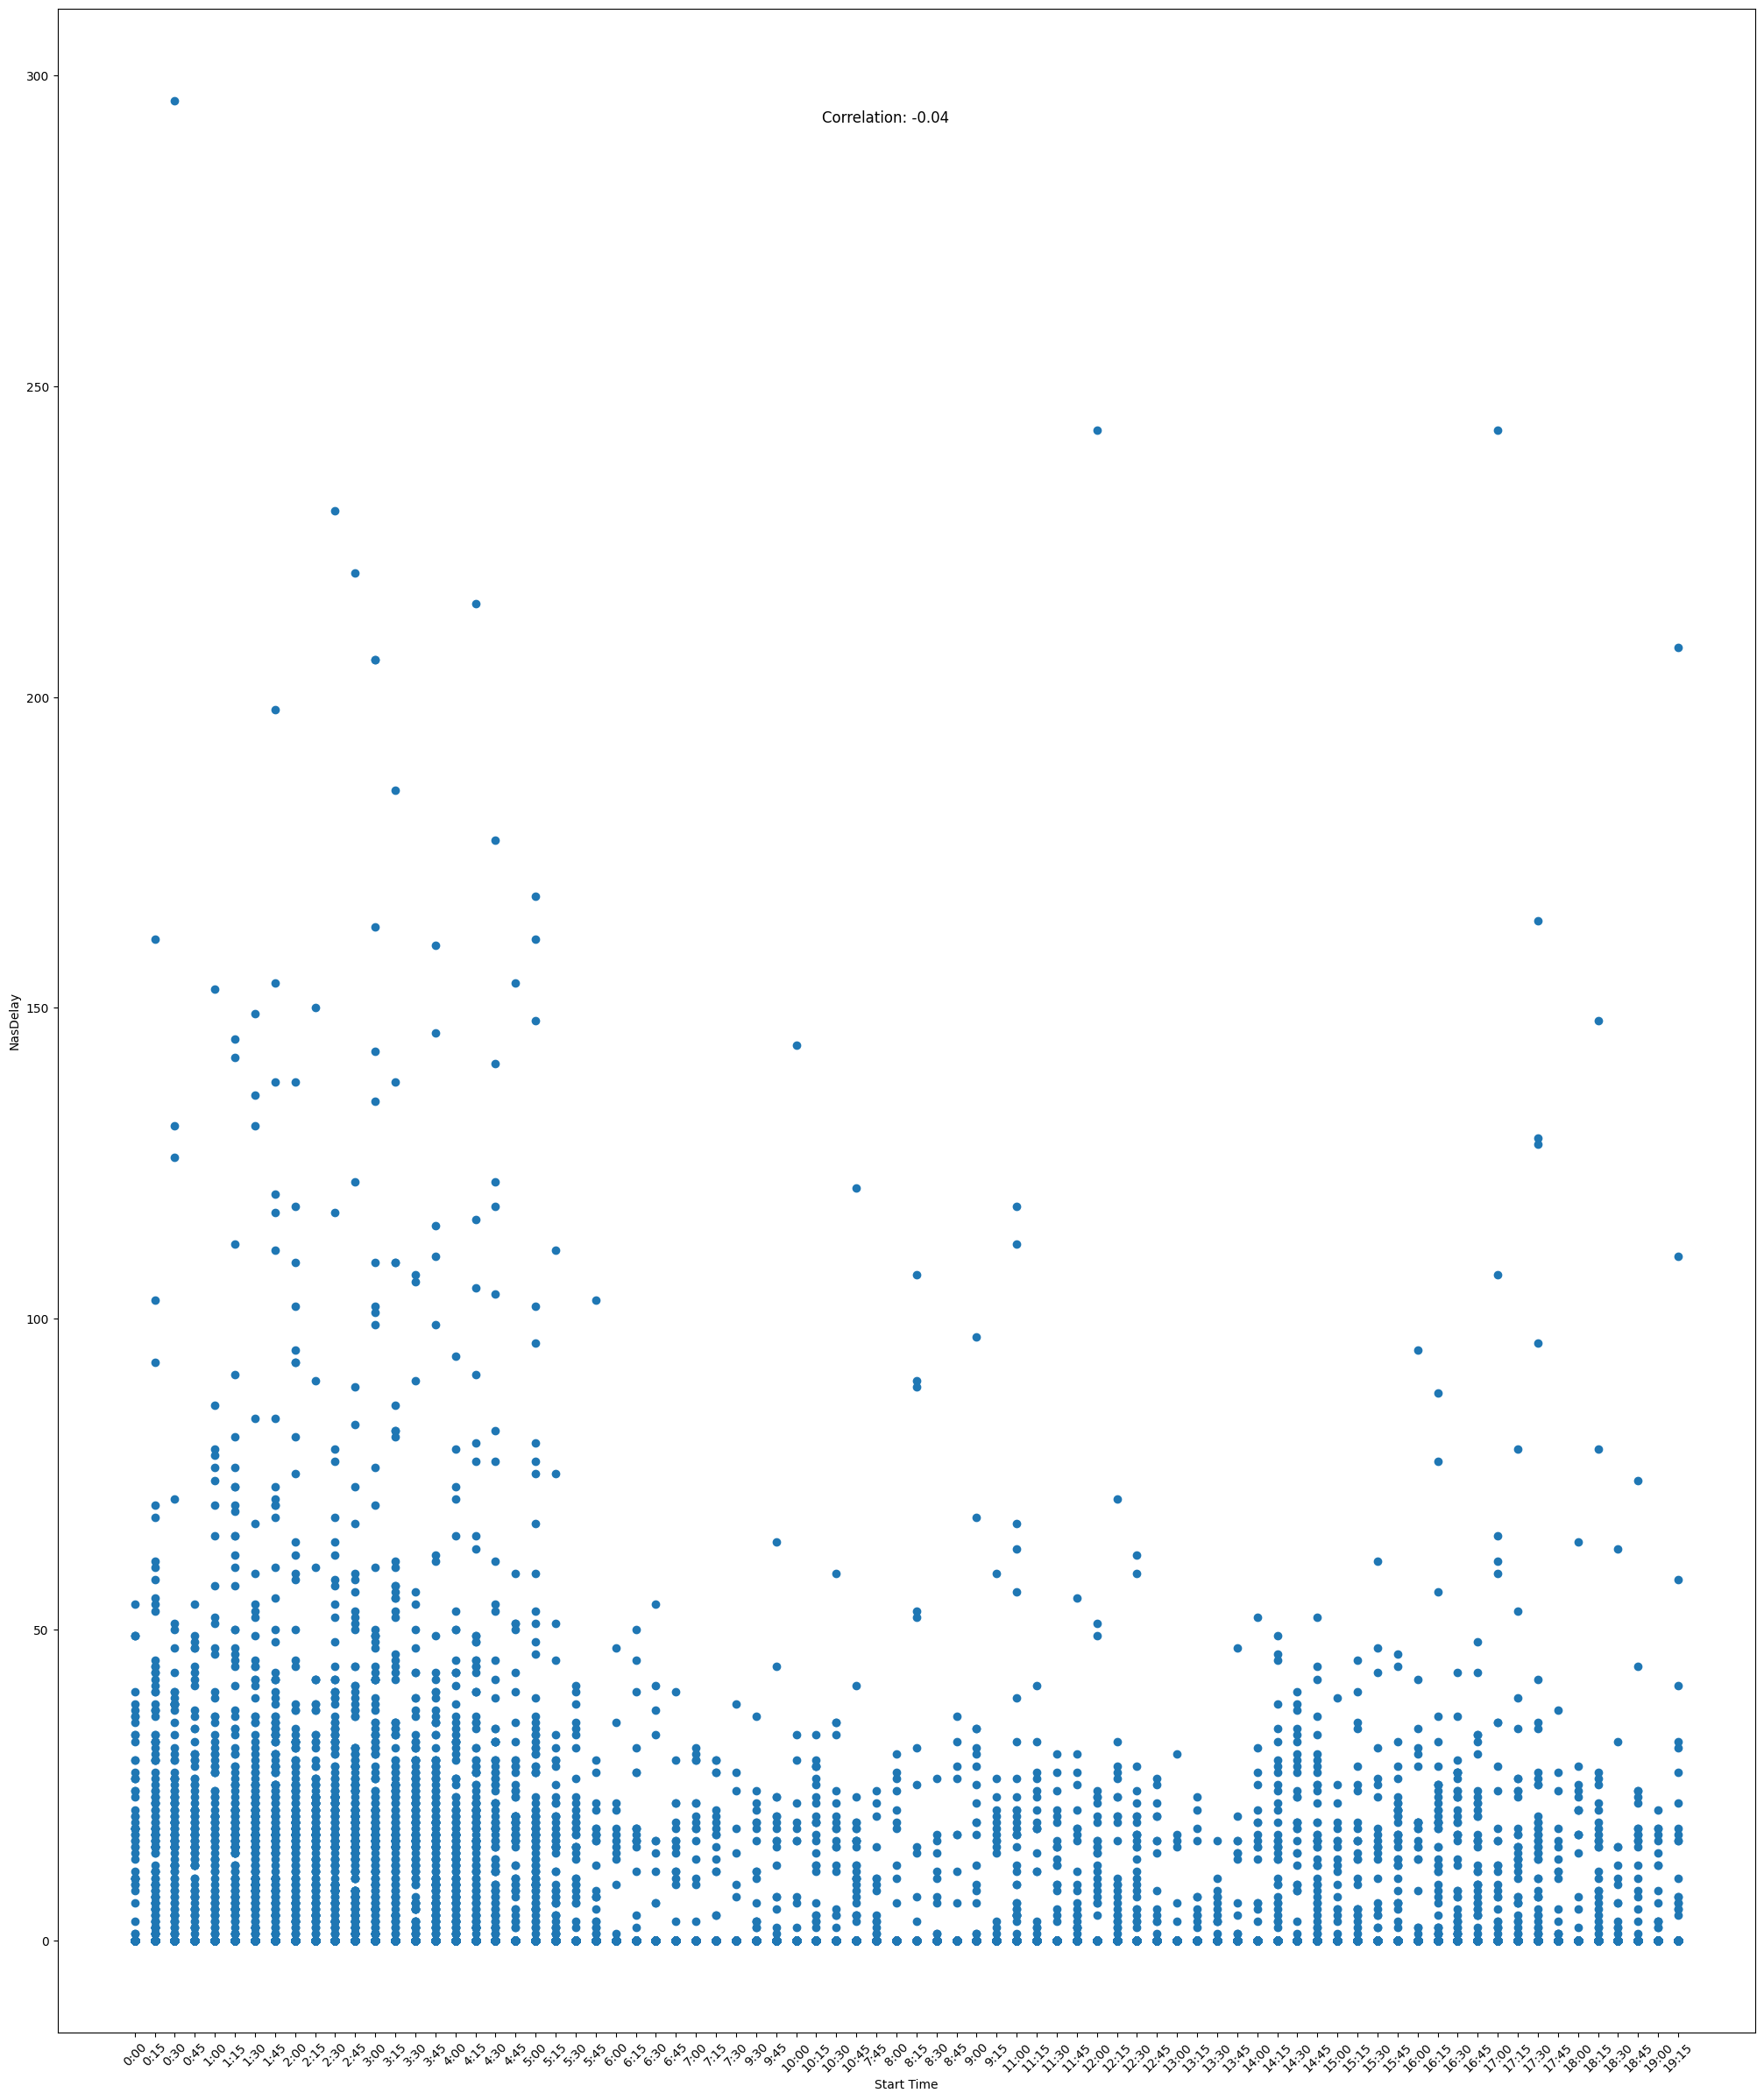

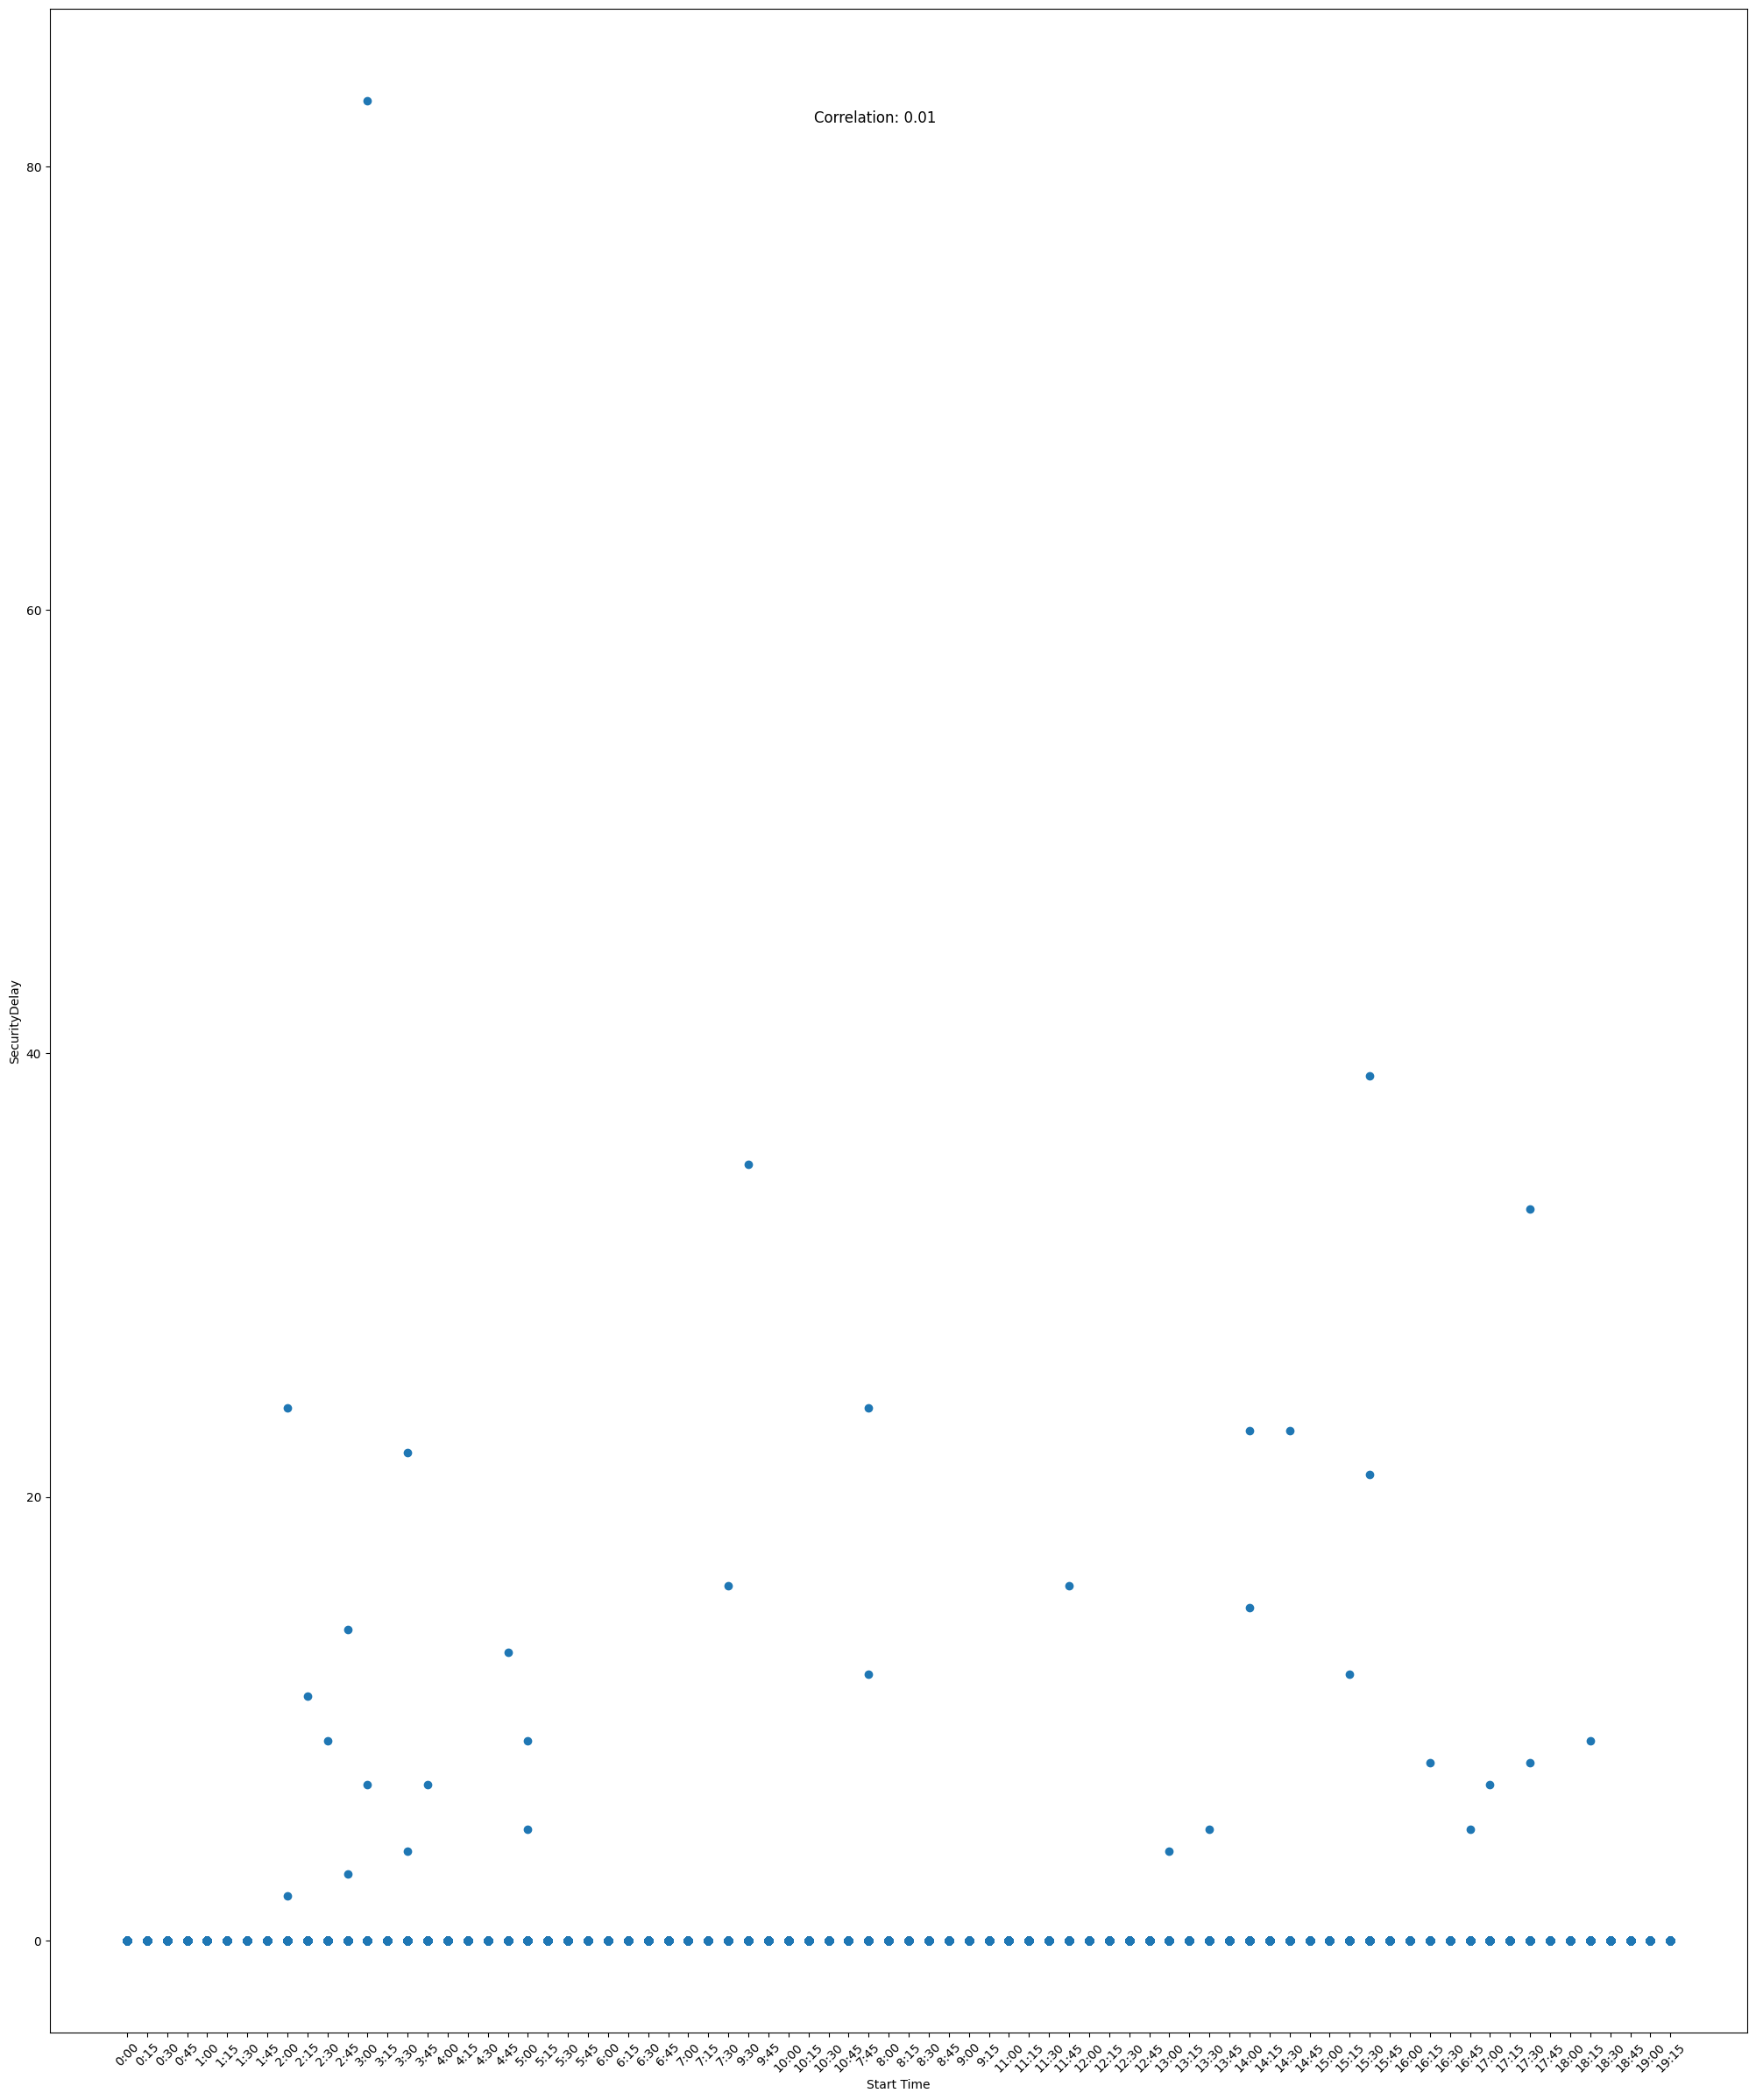

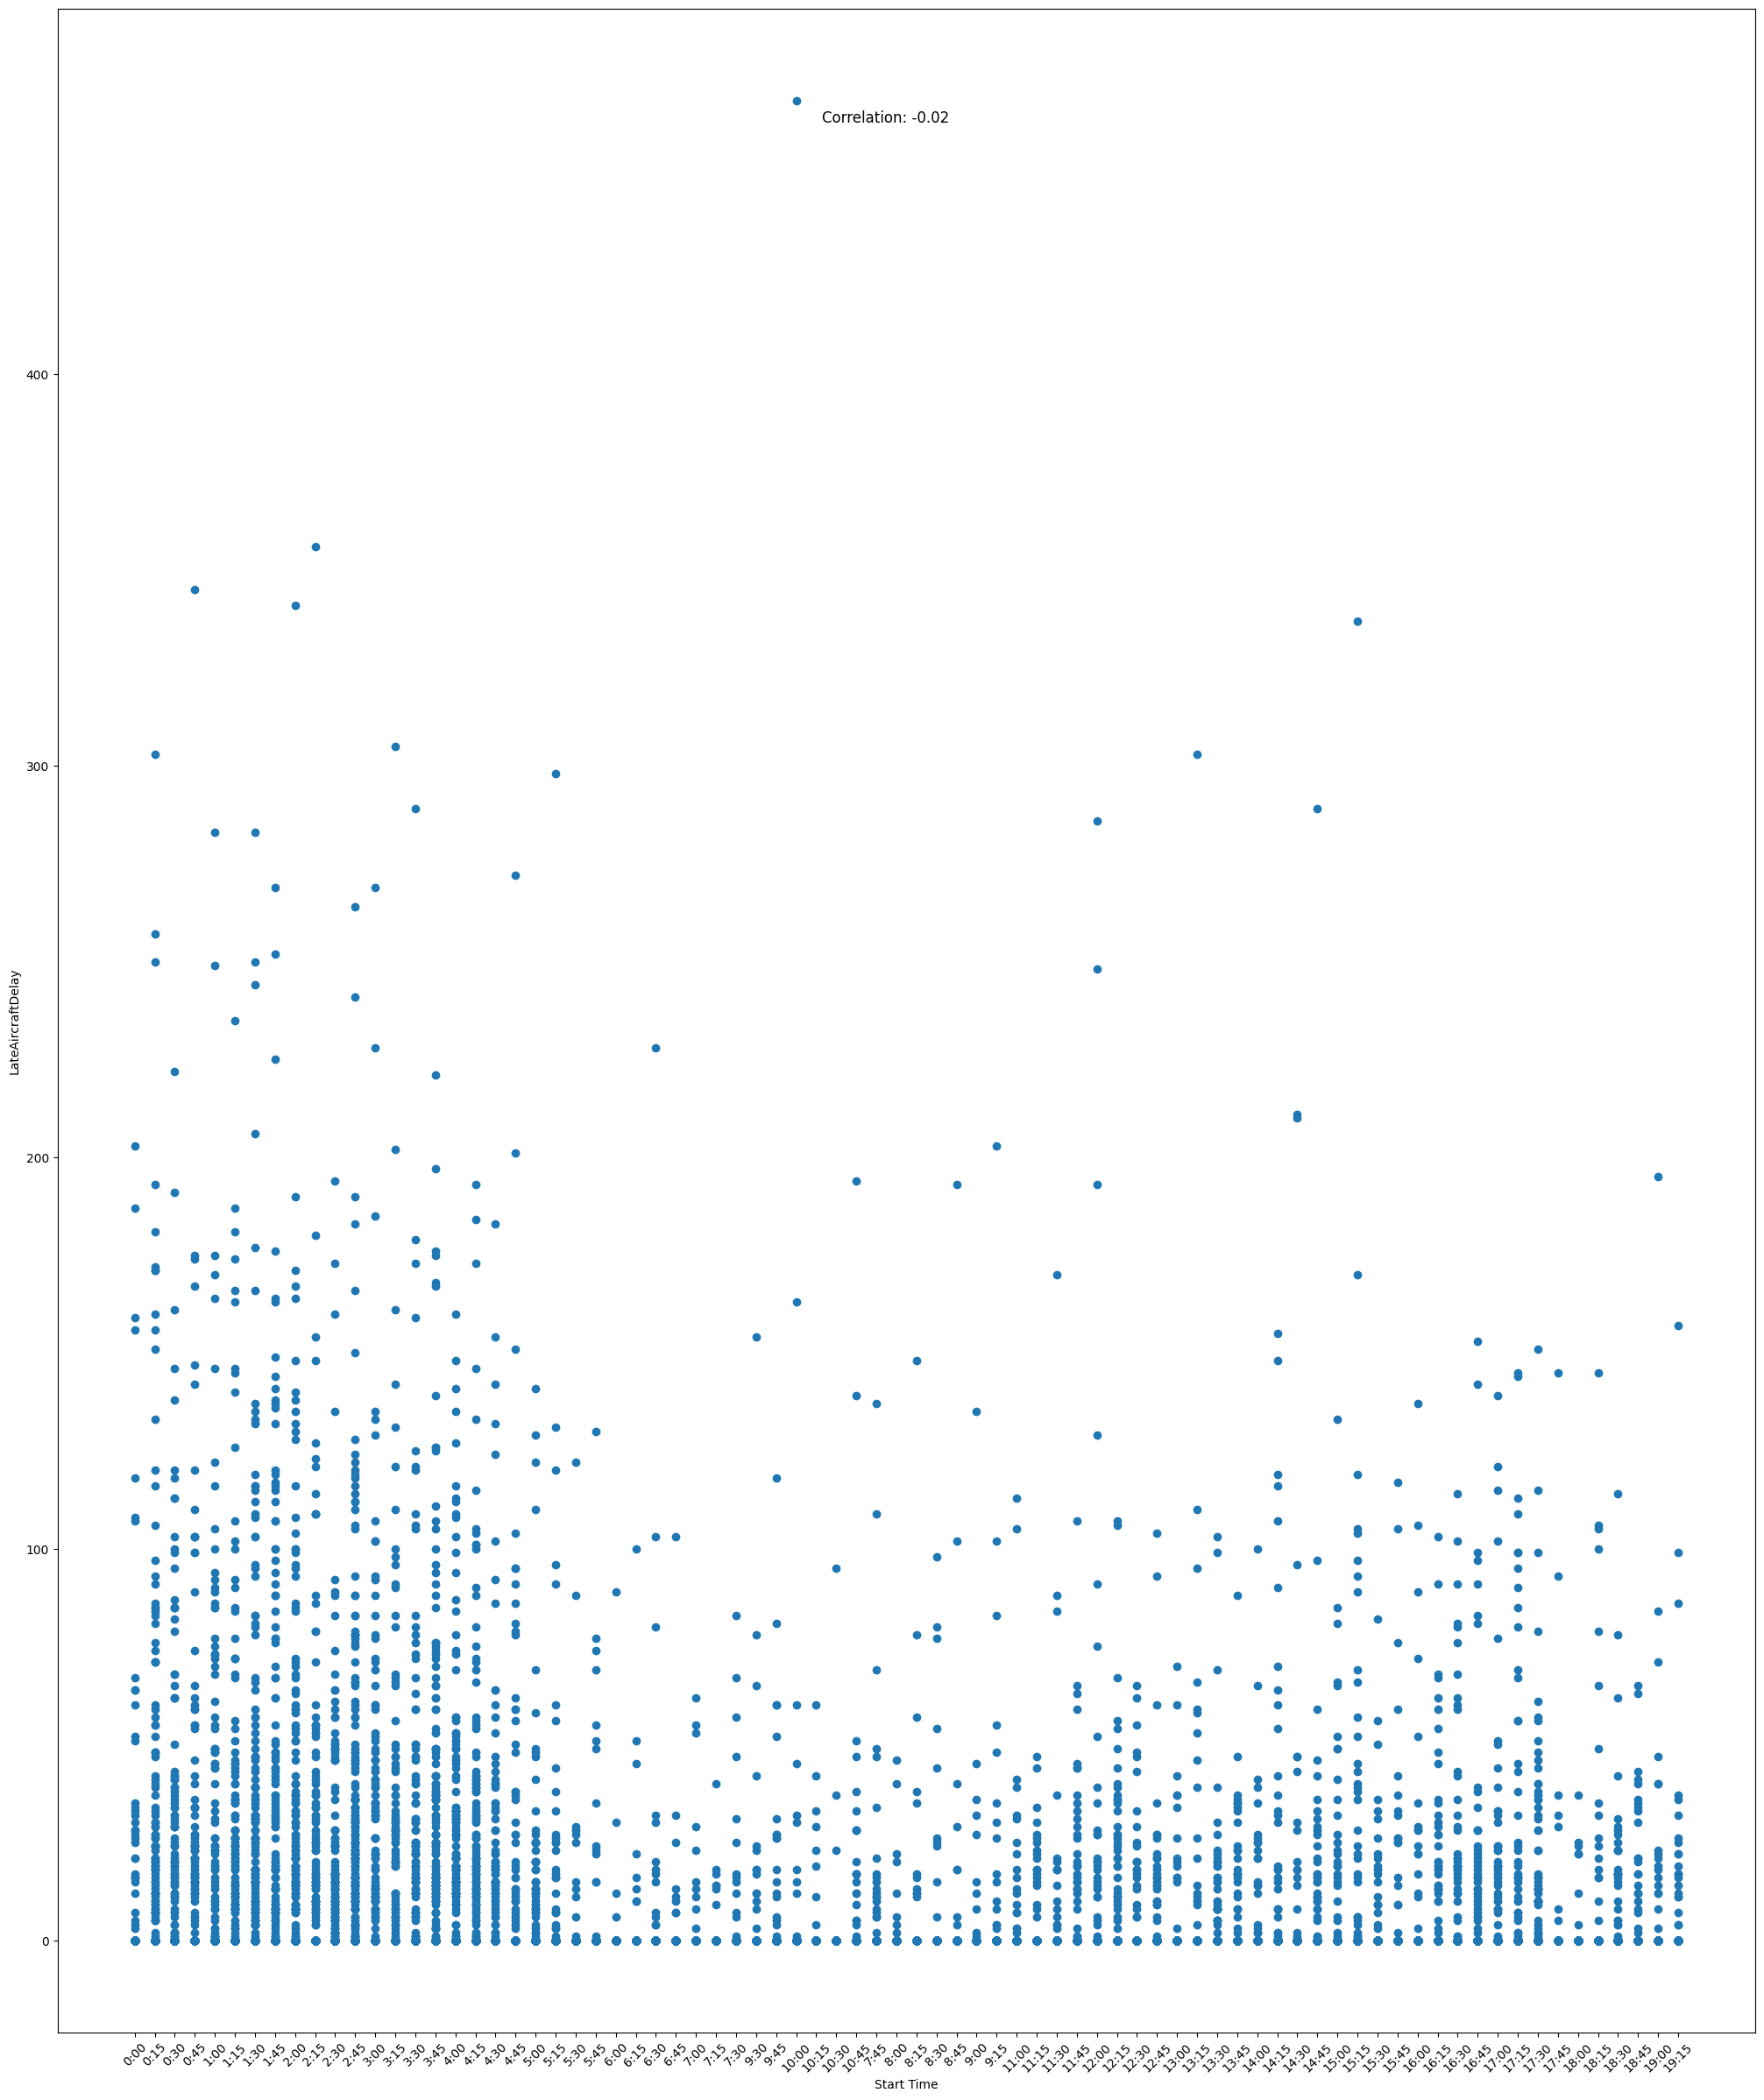

In [151]:
columns = ['ArrDelay', 'ArrDelayMinutes', 'CarrierDelay', 'WeatherDelay', 'NasDelay', 'SecurityDelay', 'LateAircraftDelay']
for col in columns:
    merged_df = pd.merge(delay_data_frame[col], taxi_rides_data_frame['formatted_start_time'], left_index=True, right_index=True, how='right')
    correlation_coefficient = delay_data_frame[col].corr(taxi_rides_data_frame['formatted_start_time'])
    plt.figure(figsize=(25, 30))
    formatted_times = [str(int(time) // 100) + ':' + str(int(time) % 100).zfill(2) for time in merged_df['formatted_start_time']]
    plt.scatter(formatted_times, merged_df[col])
    plt.ylabel(col)
    plt.xlabel('Start Time')
    plt.xticks(rotation=45)
    plt.text(0.45, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top')

In [153]:
cur1.execute("SELECT * FROM hive_data.ontime.ontime")
data = cur1.fetchall()

In [159]:
df = pd.DataFrame(data, columns=[desc[0] for desc in cur1.description])

print(df.head(2))

   year  quarter  month  dayofmonth  dayofweek  flightdate reporting_airline  \
0  2013        1      1          27          7  2013-01-27                9E   
1  2013        1      1          28          1  2013-01-28                9E   

   dot_id_reporting_airline iata_code_reporting_airline tail_number  ...  \
0                     20363                          9E      N907XJ  ...   
1                     20363                          9E      N923XJ  ...   

   lateaircraftdelay  firstdeptime  totaladdgtime  longestaddgtime  \
0                  0             0              0                0   
1                 21             0              0                0   

  divairportlandings divreacheddest divactualelapsedtime divarrdelay  \
0                  0              0                    0           0   
1                  0              0                    0           0   

  divdistance  divairport  
0           0           0  
1           0           0  

[2 rows x 70 colu

In [161]:
cur2.execute("SELECT * FROM hive_data.taxi.taxirides")
taxi_data = cur2.fetchall()
taxi_df = pd.DataFrame(taxi_data, columns=[desc[0] for desc in cur2.description])

print(taxi_df.head(2))

   trip_id                    company  dropoff_latitude  dropoff_longitude  \
0        1               Taxi No Name         41.929047         -87.651311   
1        2  Dispatch Taxi Affiliation         41.946295         -87.654298   

   extras  fare payment_type  pickup_latitude  pickup_longitude  tips  tolls  \
0     0.0  4.84         Cash        41.928967        -87.656157   0.0    0.0   
1     1.0  7.45         Cash        41.950546        -87.676182   0.0    0.0   

        trip_end_timestamp  trip_miles  trip_seconds     trip_start_timestamp  \
0  2013-01-01 00:00:00.000         0.4           240  2013-01-01 00:00:00.000   
1  2013-01-01 00:15:00.000         1.8           480  2013-01-01 00:00:00.000   

   trip_total  
0        4.84  
1        8.45  


In [169]:
taxi_df['trip_start_timestamp'] = pd.to_datetime(taxi_df['trip_start_timestamp'])

taxi_df['TimeBlock'] = taxi_df['trip_start_timestamp'].dt.strftime('%H%M') + '-' + (taxi_df['trip_start_timestamp'] + pd.Timedelta(minutes=59)).dt.strftime('%H%M')

df_sampled = df.sample(n=10000, random_state=42)
taxi_df_sampled = taxi_df.sample(n=10000, random_state=42)

df_sampled['arrtime'] = pd.to_datetime(df_sampled['arrtime'], format='%H%M', errors='coerce')  # Update format if needed
taxi_df_sampled['trip_start_timestamp'] = pd.to_datetime(taxi_df_sampled['trip_start_timestamp'], errors='coerce')

print(df_sampled['arrtime'].isnull().sum())
print(taxi_df_sampled['trip_start_timestamp'].isnull().sum())

df_sampled['RoundedArrTime'] = df_sampled['arrtime'].dt.round('H').dt.strftime('%H%M-%H%M')
taxi_df_sampled['RoundedTripStartTime'] = taxi_df_sampled['trip_start_timestamp'].dt.round('H').dt.strftime('%H%M-%H%M')



combined_df = pd.merge(df_sampled, taxi_df_sampled, left_on='RoundedArrTime', right_on='RoundedTripStartTime', how='inner')



170
0


In [170]:
combined_df = combined_df.dropna(subset=['arrdelay'])

In [173]:
import numpy as np
from scipy.stats import pearsonr, f_oneway

combined_df = combined_df.replace([np.inf, -np.inf], np.nan)

combined_df = combined_df.dropna()

nunique = combined_df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
combined_df = combined_df.drop(cols_to_drop, axis=1)
correlations = combined_df.select_dtypes(include=[np.number]).apply(lambda x: pearsonr(x, combined_df['arrdelay'])[0])

print(correlations.abs().sort_values(ascending=False))

arrdelay                           1.000000
arrdelayminutes                    0.971419
arrivaldelaygroups                 0.946535
depdelay                           0.933553
depdelayminutes                    0.929797
departuredelaygroups               0.877387
lateaircraftdelay                  0.708179
arrdel15                           0.670463
depdel15                           0.621305
carrierdelay                       0.551143
nasdelay                           0.375268
weatherdelay                       0.277634
taxiout                            0.258284
longestaddgtime                    0.231632
totaladdgtime                      0.231425
trip_id                            0.187041
firstdeptime                       0.170817
deptime                            0.163372
wheelsoff                          0.139475
crsarrtime                         0.137389
crsdeptime                         0.136322
wheelson                           0.082376
flight_number_reporting_airline 

In [174]:
selected_feature_names = [
    'depdelay', 'lateaircraftdelay', 'carrierdelay', 'nasdelay',
    'weatherdelay', 'taxiout', 'longestaddgtime', 'totaladdgtime',
    'firstdeptime', 'deptime', 'wheelsoff', 'crsarrtime', 'crsdeptime'
]

selected_features_df = combined_df[selected_feature_names]

In [ ]:
data_for_ml data = selected_features_df[selected_feature_names + ['arrdelay']]
data_for_ml = data_for_ml.dropna()